# Data wrangling using the transactions and customers dataset of a group of stores<a href="#Data-Wrangling" class="anchor-link">¶</a>
###### by Chinazor Ndubuisi
######
###### STEPS
###### Importing data
###### Assessing data
###### Cleaning data
###### Storing clean data


In \[1\]:

    # Importing necessary libraries

    import pandas as pd
    import numpy as np

    %matplotlib inline
    from matplotlib import pyplot as plt
    import seaborn as sns
    import re #regex
    import warnings
    warnings.simplefilter('ignore')

In \[2\]:

    transactions=pd.read_excel('C:/Users/e7450/Downloads/QVI_transaction_data.xlsx')
    customers=pd.read_csv('C:/Users/e7450/Downloads/QVI_purchase_behaviour.csv')

In \[3\]:

    transactions.head(2)

Out\[3\]:

|     | DATE  | STORE_NBR | LYLTY_CARD_NBR | TXN_ID | PROD_NBR | PROD_NAME                       | PROD_QTY | TOT_SALES |
|-----|-------|-----------|----------------|--------|----------|---------------------------------|----------|-----------|
| 0   | 43390 | 1         | 1000           | 1      | 5        | Natural Chip Compny SeaSalt175g | 2        | 6.0       |
| 1   | 43599 | 1         | 1307           | 348    | 66       | CCs Nacho Cheese 175g           | 3        | 6.3       |

In \[4\]:

    customers.head(2)

Out\[4\]:

|     | LYLTY_CARD_NBR | LIFESTAGE             | PREMIUM_CUSTOMER |
|-----|----------------|-----------------------|------------------|
| 0   | 1000           | YOUNG SINGLES/COUPLES | Premium          |
| 1   | 1002           | YOUNG SINGLES/COUPLES | Mainstream       |

## Assessing the data<a href="#Assessing-the-data" class="anchor-link">¶</a>

### Transactions dataframe<a href="#Transactions-dataframe" class="anchor-link">¶</a>

In \[5\]:

    transactions.sample(10)

Out\[5\]:

|        | DATE  | STORE_NBR | LYLTY_CARD_NBR | TXN_ID | PROD_NBR | PROD_NAME                             | PROD_QTY | TOT_SALES |
|--------|-------|-----------|----------------|--------|----------|---------------------------------------|----------|-----------|
| 47189  | 43341 | 168       | 168037         | 169564 | 22       | Thins Chips Originl saltd 175g        | 2        | 6.6       |
| 181721 | 43411 | 207       | 207023         | 204715 | 114      | Kettle Sensations Siracha Lime 150g   | 2        | 9.2       |
| 22129  | 43562 | 166       | 166173         | 167915 | 99       | Pringles Sthrn FriedChicken 134g      | 2        | 7.4       |
| 74502  | 43362 | 112       | 112036         | 113906 | 72       | WW Crinkle Cut Original 175g          | 2        | 3.4       |
| 46437  | 43586 | 160       | 160043         | 160423 | 85       | RRD Honey Soy Chicken 165g            | 2        | 6.0       |
| 126388 | 43452 | 128       | 128235         | 132141 | 69       | Smiths Chip Thinly S/Cream&Onion 175g | 2        | 6.0       |
| 68085  | 43606 | 238       | 238207         | 242698 | 52       | Grain Waves Sour Cream&Chives 210G    | 2        | 7.2       |
| 76733  | 43363 | 168       | 168087         | 169873 | 15       | Twisties Cheese 270g                  | 2        | 9.2       |
| 231686 | 43556 | 84        | 84258          | 83932  | 87       | Infuzions BBQ Rib Prawn Crackers 110g | 2        | 7.6       |
| 261317 | 43637 | 114       | 114220         | 118283 | 99       | Pringles Sthrn FriedChicken 134g      | 2        | 7.4       |

In \[6\]:

    shape = transactions.shape
    print(f"The transactions dataframe has {shape[0]} rows and {shape[1]} columns.")

    The transactions dataframe has 264836 rows and 8 columns.

In \[7\]:

    transactions.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 264836 entries, 0 to 264835
    Data columns (total 8 columns):
     #   Column          Non-Null Count   Dtype  
    ---  ------          --------------   -----  
     0   DATE            264836 non-null  int64  
     1   STORE_NBR       264836 non-null  int64  
     2   LYLTY_CARD_NBR  264836 non-null  int64  
     3   TXN_ID          264836 non-null  int64  
     4   PROD_NBR        264836 non-null  int64  
     5   PROD_NAME       264836 non-null  object 
     6   PROD_QTY        264836 non-null  int64  
     7   TOT_SALES       264836 non-null  float64
    dtypes: float64(1), int64(6), object(1)
    memory usage: 16.2+ MB

In \[8\]:

    # Checking the number of duplicates in the transactions table
    dup=transactions.duplicated().sum()
    print(f"The transactions dataframe has {dup} duplicate row.")

    The transactions dataframe has 1 duplicate row.

In \[9\]:

    transactions.describe()

Out\[9\]:

|       | DATE          | STORE_NBR    | LYLTY_CARD_NBR | TXN_ID       | PROD_NBR      | PROD_QTY      | TOT_SALES     |
|-------|---------------|--------------|----------------|--------------|---------------|---------------|---------------|
| count | 264836.000000 | 264836.00000 | 2.648360e+05   | 2.648360e+05 | 264836.000000 | 264836.000000 | 264836.000000 |
| mean  | 43464.036260  | 135.08011    | 1.355495e+05   | 1.351583e+05 | 56.583157     | 1.907309      | 7.304200      |
| std   | 105.389282    | 76.78418     | 8.057998e+04   | 7.813303e+04 | 32.826638     | 0.643654      | 3.083226      |
| min   | 43282.000000  | 1.00000      | 1.000000e+03   | 1.000000e+00 | 1.000000      | 1.000000      | 1.500000      |
| 25%   | 43373.000000  | 70.00000     | 7.002100e+04   | 6.760150e+04 | 28.000000     | 2.000000      | 5.400000      |
| 50%   | 43464.000000  | 130.00000    | 1.303575e+05   | 1.351375e+05 | 56.000000     | 2.000000      | 7.400000      |
| 75%   | 43555.000000  | 203.00000    | 2.030942e+05   | 2.027012e+05 | 85.000000     | 2.000000      | 9.200000      |
| max   | 43646.000000  | 272.00000    | 2.373711e+06   | 2.415841e+06 | 114.000000    | 200.000000    | 650.000000    |

In \[10\]:

    transactions.hist(figsize=(15,12));

<img
src="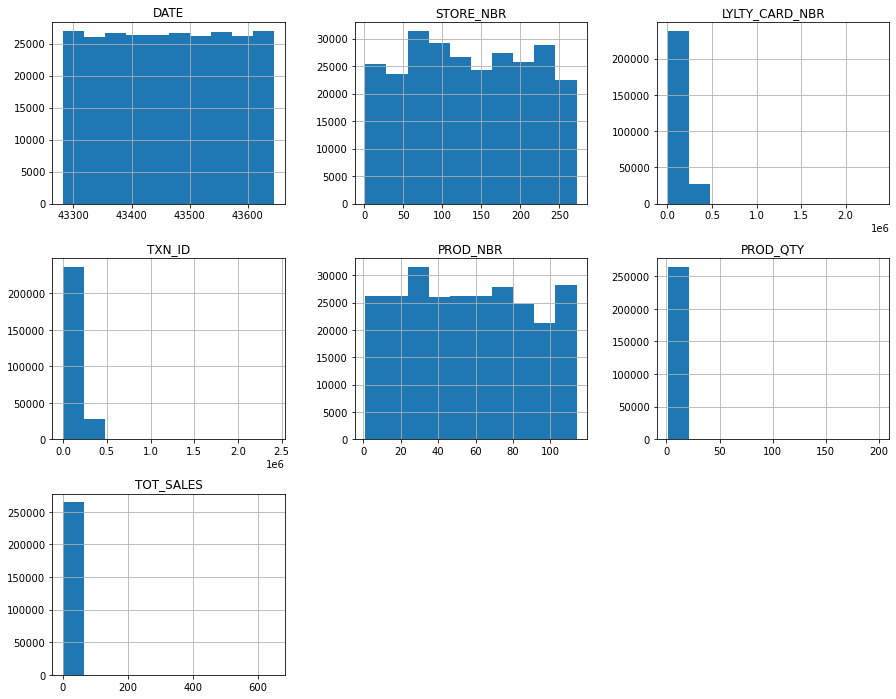%0A"
class="jp-needs-light-background" />

In \[11\]:

    transactions['STORE_NBR'].unique()

Out\[11\]:

    array([  1,   2,   4,   5,   7,   8,   9,  13,  19,  20,  22,  23,  25,
            33,  36,  38,  39,  41,  43,  45,  51,  54,  55,  56,  58,  59,
            60,  62,  63,  67,  71,  72,  74,  75,  80,  81,  82,  83,  84,
            88,  94,  96,  97, 101, 102, 104, 106, 109, 110, 111, 112, 114,
           115, 116, 118, 119, 120, 122, 125, 128, 129, 130, 133, 149, 151,
           152, 153, 156, 157, 160, 161, 164, 166, 167, 168, 169, 172, 173,
           175, 178, 181, 184, 186, 187, 191, 194, 196, 197, 200, 205, 207,
           208, 209, 212, 214, 215, 216, 217, 219, 222, 223, 225, 226, 227,
           235, 236, 237, 241, 243, 246, 247, 248, 250, 253, 255, 256, 257,
           262, 265, 266, 269, 271,  77,   3,   6,  10,  12,  15,  16,  17,
            18,  21,  24,  26,  27,  28,  29,  30,  32,  34,  35,  37,  40,
            46,  47,  48,  49,  50,  52,  53,  57,  61,  64,  65,  66,  68,
            69,  70,  73,  78,  79,  86,  87,  89,  90,  91,  93,  95,  98,
           100, 103, 105, 107, 108, 113, 117, 121, 123, 124, 126, 127, 131,
           132, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 147,
           148, 150, 154, 155, 158, 162, 163, 165, 170, 171, 174, 176, 177,
           179, 180, 182, 183, 185, 188, 189, 190, 192, 195, 199, 201, 202,
           203, 210, 213, 218, 220, 221, 224, 228, 229, 230, 231, 232, 233,
           234, 238, 239, 240, 242, 244, 245, 249, 251, 254, 259, 260, 261,
           263, 264, 267, 268, 270, 272,  14,  42,  44,  92,  99, 139, 146,
           159, 198, 204, 258, 211,  31,  85,  76,  11, 252, 193, 206],
          dtype=int64)

In \[12\]:

    transactions['PROD_NBR'].unique()

Out\[12\]:

    array([  5,  66,  61,  69, 108,  57,  16,  24,  42,  52, 114,  15,  92,
            44,  54,  94,  98,  93,  56,   7,  31,  32, 111,  46,  13,  99,
            26,  64,  22,  48,  37,  36,  51, 107, 106,   4, 113,  45,  39,
           102, 104,   3,  82,  88,  40,  73,  87,  84,  70,  89, 101,  63,
            25,  47,  71,  65,  33,  35,  12,   8,  75, 100,  29,  59,  30,
            81,  67, 110,  28,   2,  14,  77,  17,  83,  68,  96,  79,  23,
            50,  78,   1,  86,  53,  72,  74,  76,   9,  91, 105,  90, 109,
            27,  62, 112,  55,  18,  34,  49,  60,  38, 103,  85,  95,  97,
            20,  19,  21,   6,  80,  58,  10,  11,  43,  41], dtype=int64)

### Customers dataframe<a href="#Customers-dataframe" class="anchor-link">¶</a>

In \[13\]:

    customers.sample(10)

Out\[13\]:

|       | LYLTY_CARD_NBR | LIFESTAGE              | PREMIUM_CUSTOMER |
|-------|----------------|------------------------|------------------|
| 7558  | 27061          | YOUNG SINGLES/COUPLES  | Budget           |
| 48442 | 181231         | MIDAGE SINGLES/COUPLES | Budget           |
| 23779 | 86216          | NEW FAMILIES           | Budget           |
| 33890 | 124287         | OLDER FAMILIES         | Budget           |
| 52356 | 197037         | YOUNG SINGLES/COUPLES  | Mainstream       |
| 18214 | 66277          | YOUNG FAMILIES         | Premium          |
| 63319 | 238013         | YOUNG SINGLES/COUPLES  | Mainstream       |
| 27714 | 101227         | OLDER FAMILIES         | Budget           |
| 40295 | 151096         | YOUNG SINGLES/COUPLES  | Budget           |
| 38738 | 145060         | OLDER SINGLES/COUPLES  | Budget           |

In \[14\]:

    shape = customers.shape
    print(f"The customers dataframe has {shape[0]} rows and {shape[1]} columns.")

    The customers dataframe has 72637 rows and 3 columns.

In \[15\]:

    customers.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 72637 entries, 0 to 72636
    Data columns (total 3 columns):
     #   Column            Non-Null Count  Dtype 
    ---  ------            --------------  ----- 
     0   LYLTY_CARD_NBR    72637 non-null  int64 
     1   LIFESTAGE         72637 non-null  object
     2   PREMIUM_CUSTOMER  72637 non-null  object
    dtypes: int64(1), object(2)
    memory usage: 1.7+ MB

In \[16\]:

    # Checking the number of duplicates in the transactions table
    duplic=customers.duplicated().sum()
    print(f"The transactions dataframe has {duplic} duplicate rows.")

    The transactions dataframe has 0 duplicate rows.

In \[17\]:

    customers['LIFESTAGE'].unique()

Out\[17\]:

    array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
           'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
           'RETIREES'], dtype=object)

In \[18\]:

    plt.figure(figsize=(10, 8));


    sort_emp= customers.LIFESTAGE.value_counts()
    color = sns.color_palette()[0]
                 
    sns.countplot(data=customers, y='LIFESTAGE',color=color, order=sort_emp.index)
    plt.xlabel('Count', fontsize=13)
    plt.ylabel('LIFESTAGE', fontsize=13)
    plt.title('Number of chips purchase by life stages',fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    for i, count in enumerate(sort_emp):
        plt.text(count + 1, i, str(count), va='center', fontsize=12);

<img
src="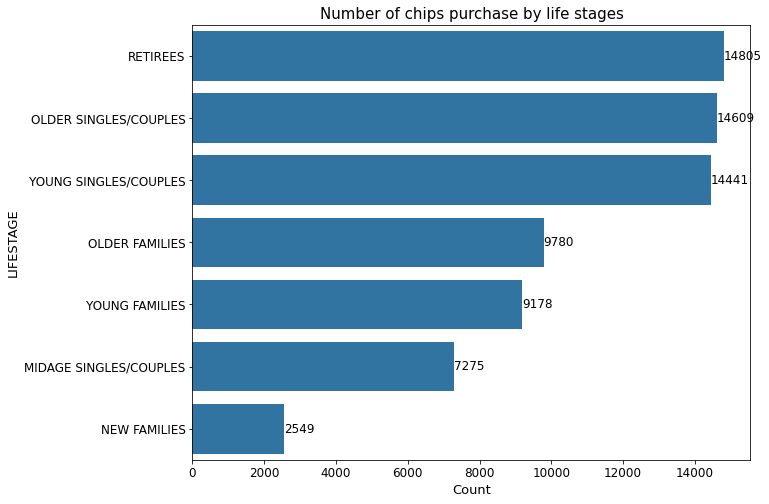%0A"
class="jp-needs-light-background" />

In \[19\]:

    customers['PREMIUM_CUSTOMER'].unique()

Out\[19\]:

    array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In \[20\]:

    plt.figure(figsize=(10, 8));


    sort_emp= customers.PREMIUM_CUSTOMER.value_counts()
    color = sns.color_palette()[0]
                 
    sns.countplot(data=customers, y='PREMIUM_CUSTOMER',color=color, order=sort_emp.index)
    plt.xlabel('Count', fontsize=13)
    plt.ylabel('CUSTOMER SEGMENTS', fontsize=13)
    plt.title('Number of chips purchase by Customer segments',fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    for i, count in enumerate(sort_emp):
        plt.text(count + 1, i, str(count), va='center', fontsize=12);

<img
src="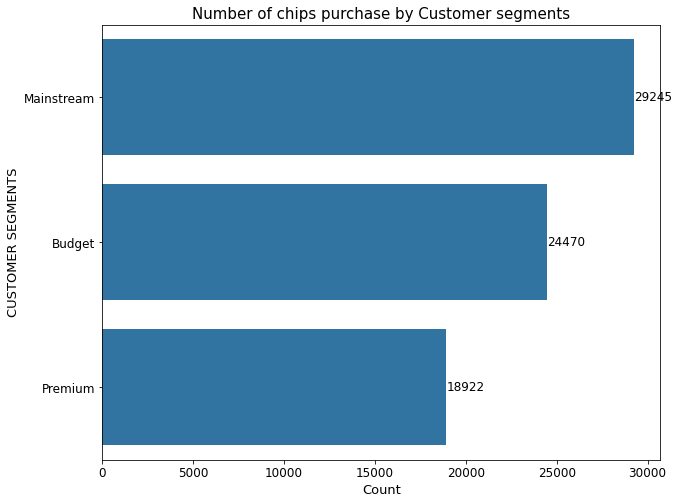%0A"
class="jp-needs-light-background" />

## Cleaning<a href="#Cleaning" class="anchor-link">¶</a>

Before altering any part of the data, it is essential to make a copy, so
as to easily revert back if necessary

In \[21\]:

    df_t=transactions.copy()

In \[22\]:

    df_c=customers.copy()

### Quality and Tidiness issues to be cleaned

1.  Change all column names to lowercase for ease of coding
2.  Remove duplicates in the transactions table
3.  Extract pack_size and brand_name from prod_name column and create
    two new columns for them
4.  Drop prod_name column after extraction
5.  Change date column to datetime data type.
6.  Remove outliers from prod_qty and consequently, tot_sales column
7.  Rename premium_customer column in the customers table to
    customer_segments to represent the column content better
8.  Merge the two dataframes and save

## Issue 1:<a href="#Issue-1:" class="anchor-link">¶</a>

Change all column names to lowercase for ease of coding

#### Code<a href="#Code" class="anchor-link">¶</a>

In \[23\]:

    # Change column names to lowercase for easy coding

    df_t.columns= df_t.columns.str.lower()
    df_c.columns= df_c.columns.str.lower()

In \[24\]:

    df_t.columns

Out\[24\]:

    Index(['date', 'store_nbr', 'lylty_card_nbr', 'txn_id', 'prod_nbr',
           'prod_name', 'prod_qty', 'tot_sales'],
          dtype='object')

In \[25\]:

    df_c.columns

Out\[25\]:

    Index(['lylty_card_nbr', 'lifestage', 'premium_customer'], dtype='object')

## Issue 2:<a href="#Issue-2:" class="anchor-link">¶</a>

Remove duplicates in the transactions table

In \[26\]:

    df_t.duplicated().sum()

Out\[26\]:

    1

#### Code<a href="#Code" class="anchor-link">¶</a>

In \[27\]:

    # Remove duplicates in the transactions table

    df_t.drop_duplicates (inplace=True)

In \[28\]:

    # Confirming that duplicates in the movies column have been dropped

    df_t.duplicated().sum()

Out\[28\]:

    0

## Issue 3:<a href="#Issue-3:" class="anchor-link">¶</a>

Extract pack_size and brand_name from prod_name column and create two
new columns for them

#### Code<a href="#Code" class="anchor-link">¶</a>

In \[29\]:

    # Extracting pack size from prod_name column
    df_t['pack_size'] = df_t['prod_name'].astype('str').str.extractall('(\d+)').unstack().fillna(' ').sum(axis=1).astype(int)

    # Extracting brand names
    df_t['brand_name']= df_t['prod_name'].str.extract('^(\D+)')[0].str.strip()

#### Test<a href="#Test" class="anchor-link">¶</a>

In \[30\]:

    df_t.sample(5)

Out\[30\]:

|        | date  | store_nbr | lylty_card_nbr | txn_id | prod_nbr | prod_name                               | prod_qty | tot_sales | pack_size | brand_name                         |
|--------|-------|-----------|----------------|--------|----------|-----------------------------------------|----------|-----------|-----------|------------------------------------|
| 144956 | 43403 | 172       | 172157         | 173711 | 68       | Pringles Chicken Salt Crips 134g        | 2        | 7.4       | 134       | Pringles Chicken Salt Crips        |
| 36142  | 43470 | 45        | 45211          | 41598  | 63       | Kettle 135g Swt Pot Sea Salt            | 2        | 8.4       | 135       | Kettle                             |
| 184725 | 43301 | 269       | 269227         | 266412 | 3        | Kettle Sensations Camembert & Fig 150g  | 2        | 9.2       | 150       | Kettle Sensations Camembert & Fig  |
| 192418 | 43316 | 103       | 103118         | 103197 | 89       | Kettle Sweet Chilli And Sour Cream 175g | 2        | 10.8      | 175       | Kettle Sweet Chilli And Sour Cream |
| 55619  | 43600 | 225       | 225109         | 225322 | 13       | Red Rock Deli Thai Chilli&Lime 150g     | 1        | 2.7       | 150       | Red Rock Deli Thai Chilli&Lime     |

In \[31\]:

    # Visualizing pack size after extraction

    plt.figure(figsize=(15, 7));
    sns.violinplot(data=df_t, x=df_t['pack_size'], inner='quartile')
    plt.xlabel('Pack Sizes (In Grams)', fontsize=14)
    plt.ylabel('')
    plt.title('Quantity of Various Pack Sizes Sold', fontsize=15)
    plt.tick_params(axis='both', labelsize=12)

<img
src="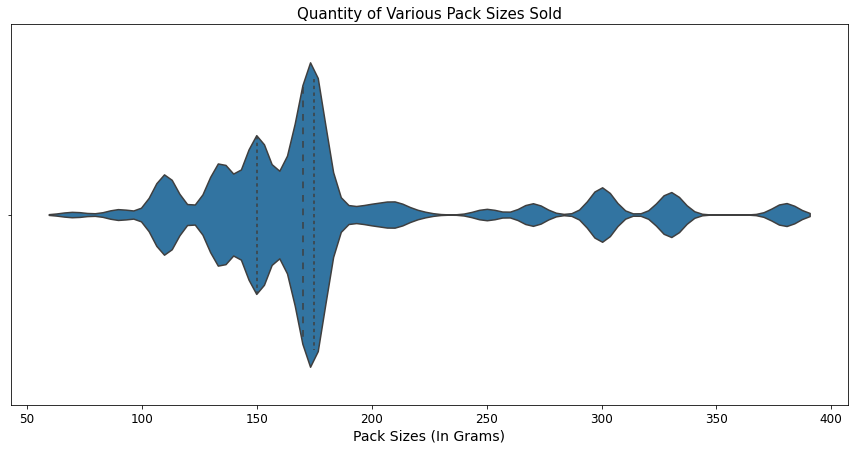%0A"
class="jp-needs-light-background" />

In \[32\]:

    df_t.pack_size.describe()

Out\[32\]:

    count    264835.000000
    mean        182.427032
    std          64.327316
    min          70.000000
    25%         150.000000
    50%         170.000000
    75%         175.000000
    max         380.000000
    Name: pack_size, dtype: float64

## Issue 4:<a href="#Issue-4:" class="anchor-link">¶</a>

Drop prod_name column after extraction

#### Code<a href="#Code" class="anchor-link">¶</a>

In \[33\]:

    df_t.drop(columns=['prod_name'], inplace=True)

#### Test<a href="#Test" class="anchor-link">¶</a>

In \[34\]:

    df_t.columns

Out\[34\]:

    Index(['date', 'store_nbr', 'lylty_card_nbr', 'txn_id', 'prod_nbr', 'prod_qty',
           'tot_sales', 'pack_size', 'brand_name'],
          dtype='object')

## Issue 5:<a href="#Issue-5:" class="anchor-link">¶</a>

Change date column to datetime data type.

#### Code<a href="#Code" class="anchor-link">¶</a>

In \[35\]:

    df_t['date'] = pd.to_datetime(df_t['date'], unit='D', origin = '1899-12-30')

#### Test<a href="#Test" class="anchor-link">¶</a>

In \[36\]:

    print(df_t.date.dtype)

    datetime64[ns]

In \[37\]:

    df_t.sample(2)

Out\[37\]:

|        | date       | store_nbr | lylty_card_nbr | txn_id | prod_nbr | prod_qty | tot_sales | pack_size | brand_name                        |
|--------|------------|-----------|----------------|--------|----------|----------|-----------|-----------|-----------------------------------|
| 110452 | 2019-03-08 | 160       | 160012         | 160260 | 78       | 2        | 6.6       | 175       | Thins Chips Salt & Vinegar        |
| 196692 | 2018-12-26 | 162       | 162200         | 162999 | 3        | 2        | 9.2       | 150       | Kettle Sensations Camembert & Fig |

## Issue 6:<a href="#Issue-5:" class="anchor-link">¶</a>

Remove outliers from prod_qty and consequently, tot_sales column

In \[38\]:

    plt.figure(figsize=(15, 7));
    sns.violinplot(data=df_t, x=df_t['prod_qty'], inner='quartile')
    plt.xlabel('Product Quantity', fontsize=14)
    plt.ylabel('')
    plt.title('Distribution of product quantity', fontsize=15)
    plt.tick_params(axis='both', labelsize=12)

<img
src="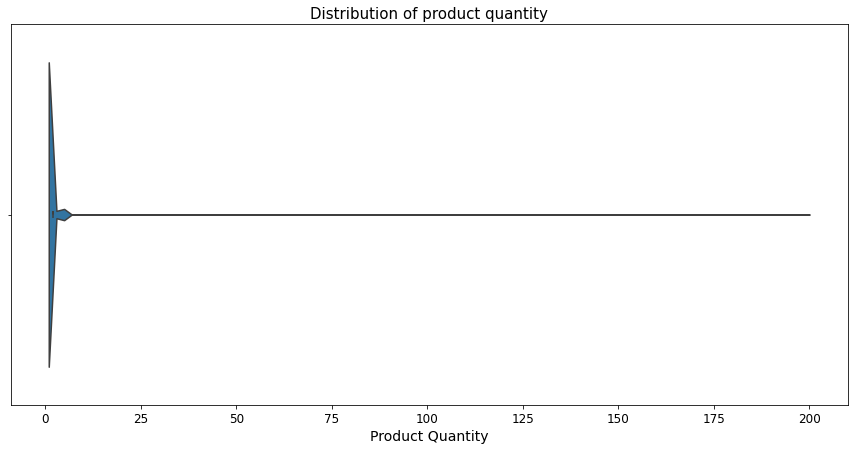%0A"
class="jp-needs-light-background" />

In \[39\]:

    df_t[['prod_qty','tot_sales']].describe()

Out\[39\]:

|       | prod_qty      | tot_sales     |
|-------|---------------|---------------|
| count | 264835.000000 | 264835.000000 |
| mean  | 1.907308      | 7.304205      |
| std   | 0.643655      | 3.083231      |
| min   | 1.000000      | 1.500000      |
| 25%   | 2.000000      | 5.400000      |
| 50%   | 2.000000      | 7.400000      |
| 75%   | 2.000000      | 9.200000      |
| max   | 200.000000    | 650.000000    |

In \[40\]:

    df_t.query('prod_qty==200')

Out\[40\]:

|       | date       | store_nbr | lylty_card_nbr | txn_id | prod_nbr | prod_qty | tot_sales | pack_size | brand_name              |
|-------|------------|-----------|----------------|--------|----------|----------|-----------|-----------|-------------------------|
| 69762 | 2018-08-19 | 226       | 226000         | 226201 | 4        | 200      | 650.0     | 380       | Dorito Corn Chp Supreme |
| 69763 | 2019-05-20 | 226       | 226000         | 226210 | 4        | 200      | 650.0     | 380       | Dorito Corn Chp Supreme |

#### Code<a href="#Code" class="anchor-link">¶</a>

In \[41\]:

    adjusted_df=df_t[df_t['prod_qty'] !=200]
    df_t=adjusted_df

#### Test<a href="#Test" class="anchor-link">¶</a>

In \[42\]:

    plt.figure(figsize=(15, 7));
    sns.violinplot(data=df_t, x=df_t['prod_qty'], inner='quartile')
    plt.xlabel('Product Quantity', fontsize=14)
    plt.ylabel('')
    plt.title('Distribution of product quantity', fontsize=15)
    plt.tick_params(axis='both', labelsize=12)

<img
src="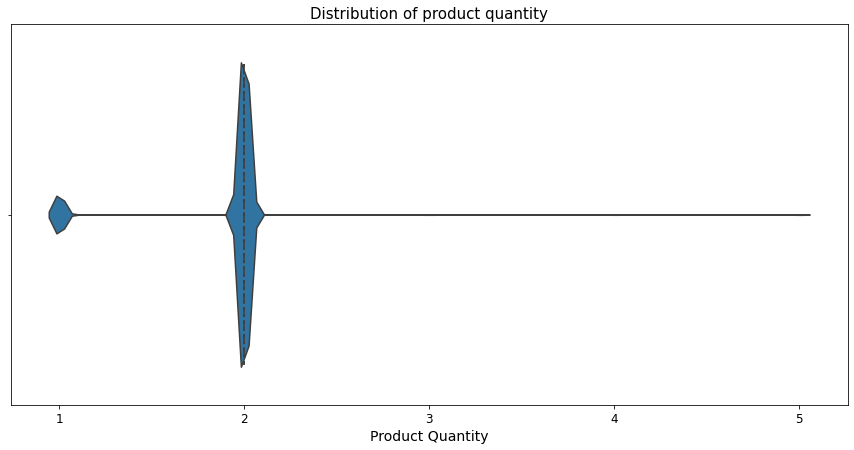%0A"
class="jp-needs-light-background" />

In \[43\]:

    df_t['prod_qty'].unique()

Out\[43\]:

    array([2, 3, 5, 1, 4], dtype=int64)

In \[44\]:

    plt.figure(figsize=(15, 7));
    sns.violinplot(data=df_t, x=df_t['tot_sales'], inner='quartile')
    plt.xlabel('Sales Quantity', fontsize=14)
    plt.ylabel('')
    plt.title('Distribution of Sales Quantity', fontsize=15)
    plt.tick_params(axis='both', labelsize=12)

<img
src="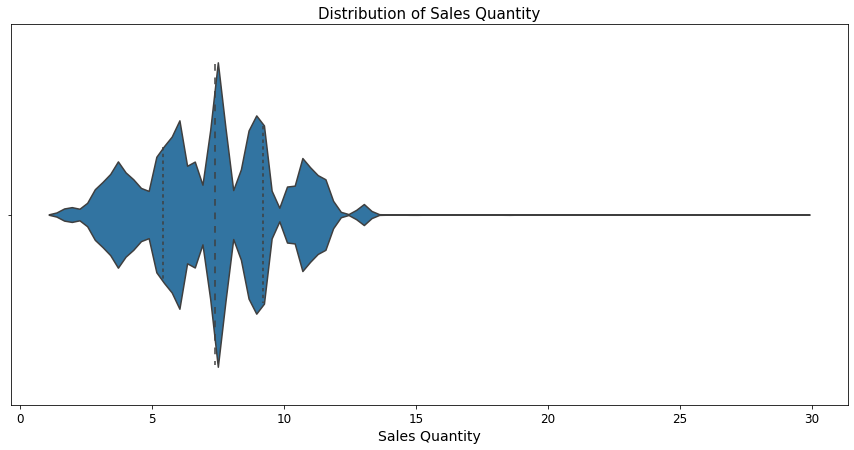%0A"
class="jp-needs-light-background" />

In \[45\]:

    df_t['tot_sales'].unique()

Out\[45\]:

    array([ 6.  ,  6.3 ,  2.9 , 15.  , 13.8 ,  5.1 ,  5.7 ,  3.6 ,  3.9 ,
            7.2 , 23.  ,  9.2 ,  1.7 ,  3.3 ,  2.1 ,  3.  ,  3.8 ,  5.4 ,
            2.7 ,  3.7 , 14.8 ,  4.4 ,  6.6 ,  2.6 ,  3.25,  4.6 ,  5.8 ,
           15.5 ,  7.8 ,  4.2 ,  7.4 ,  7.6 ,  8.4 ,  6.5 ,  4.3 , 28.5 ,
            7.5 ,  3.4 , 19.  , 11.8 , 17.6 ,  9.  , 13.2 ,  1.9 , 10.2 ,
           13.  , 15.2 , 11.4 , 14.5 ,  5.6 , 10.8 , 10.4 ,  1.5 , 16.5 ,
            1.8 ,  5.2 ,  5.9 , 18.4 ,  8.8 , 18.5 ,  6.2 ,  4.8 ,  8.6 ,
            2.8 ,  2.3 ,  3.1 ,  2.4 , 15.6 , 19.5 , 27.  ,  9.9 , 16.2 ,
           13.5 , 21.6 , 23.6 , 29.5 , 12.6 ,  8.1 , 15.3 , 11.1 , 22.  ,
            9.5 , 16.25, 20.4 , 11.7 , 22.8 ,  9.6 ,  8.5 , 10.5 , 21.  ,
           12.  , 14.4 ,  9.75, 16.8 , 25.5 , 17.7 , 17.2 , 17.1 ,  4.5 ,
            6.8 , 18.  , 12.9 , 11.5 ,  8.7 , 14.  , 11.6 , 12.4 , 21.5 ,
            9.3 , 11.2 ,  6.9 ])

## Issue 7:<a href="#Issue-7:" class="anchor-link">¶</a>

Rename premium_customer column in the customers table to
customer_segments to represent the column content better

#### Code<a href="#Code" class="anchor-link">¶</a>

In \[46\]:

    # Renaming premium_customer column to customer_segments to represent the column content better
    df_c.rename(columns={'premium_customer' :'customer_segments'}, inplace = True)

#### Test<a href="#Test" class="anchor-link">¶</a>

In \[47\]:

    df_c.columns

Out\[47\]:

    Index(['lylty_card_nbr', 'lifestage', 'customer_segments'], dtype='object')

## Issue 8:<a href="#Issue-8:" class="anchor-link">¶</a>

Merge the two dataframes and save

#### Code<a href="#Code" class="anchor-link">¶</a>

In \[48\]:

    merged_df = pd.merge(df_t, df_c, on=['lylty_card_nbr','lylty_card_nbr'],how='left')

#### Test<a href="#Test" class="anchor-link">¶</a>

In \[49\]:

    merged_df.sample(15)

Out\[49\]:

|        | date       | store_nbr | lylty_card_nbr | txn_id | prod_nbr | prod_qty | tot_sales | pack_size | brand_name                          | lifestage              | customer_segments |
|--------|------------|-----------|----------------|--------|----------|----------|-----------|-----------|-------------------------------------|------------------------|-------------------|
| 142205 | 2018-07-25 | 118       | 118068         | 121071 | 66       | 2        | 4.2       | 175       | CCs Nacho Cheese                    | RETIREES               | Budget            |
| 242929 | 2019-06-05 | 58        | 58295          | 54108  | 65       | 2        | 10.2      | 300       | Old El Paso Salsa Dip Chnky Tom Ht  | YOUNG SINGLES/COUPLES  | Mainstream        |
| 143195 | 2018-08-25 | 137       | 137224         | 140253 | 4        | 2        | 13.0      | 380       | Dorito Corn Chp Supreme             | RETIREES               | Budget            |
| 107482 | 2018-10-30 | 110       | 110219         | 112904 | 6        | 2        | 6.0       | 165       | RRD Lime & Pepper                   | OLDER SINGLES/COUPLES  | Mainstream        |
| 79152  | 2019-02-04 | 229       | 229231         | 231762 | 17       | 2        | 9.2       | 150       | Kettle Sensations BBQ&Maple         | OLDER FAMILIES         | Premium           |
| 19264  | 2018-10-13 | 70        | 70237          | 68839  | 11       | 2        | 6.0       | 165       | RRD Pc Sea Salt                     | MIDAGE SINGLES/COUPLES | Premium           |
| 84123  | 2018-07-09 | 48        | 48008          | 43102  | 7        | 2        | 11.4      | 330       | Smiths Crinkle Original             | OLDER SINGLES/COUPLES  | Budget            |
| 223004 | 2018-10-10 | 130       | 130302         | 134921 | 90       | 2        | 8.8       | 175       | Tostitos Smoked Chipotle            | YOUNG FAMILIES         | Premium           |
| 226051 | 2018-11-01 | 209       | 209178         | 208496 | 69       | 2        | 6.0       | 175       | Smiths Chip Thinly S/Cream&Onion    | YOUNG FAMILIES         | Premium           |
| 81349  | 2018-08-15 | 269       | 269149         | 265934 | 67       | 1        | 2.7       | 150       | RRD Chilli& Coconut                 | OLDER SINGLES/COUPLES  | Budget            |
| 121798 | 2019-05-25 | 63        | 63019          | 59455  | 35       | 2        | 3.0       | 300       | Woolworths Mild Salsa               | OLDER SINGLES/COUPLES  | Premium           |
| 147088 | 2018-11-28 | 214       | 214280         | 213887 | 33       | 1        | 3.8       | 110       | Cobs Popd Swt/Chlli &Sr/Cream Chips | RETIREES               | Budget            |
| 222857 | 2018-11-24 | 128       | 128189         | 131820 | 85       | 2        | 6.0       | 165       | RRD Honey Soy Chicken               | YOUNG FAMILIES         | Premium           |
| 255310 | 2018-10-08 | 229       | 229025         | 230510 | 65       | 2        | 10.2      | 300       | Old El Paso Salsa Dip Chnky Tom Ht  | YOUNG SINGLES/COUPLES  | Mainstream        |
| 111583 | 2018-10-24 | 178       | 178178         | 178651 | 56       | 2        | 4.2       | 125       | Cheezels Cheese Box                 | OLDER SINGLES/COUPLES  | Mainstream        |

Looking through the merged dataset

In \[50\]:

    shape= merged_df.shape
    print(f"The merged dataframe set has {shape[0]} rows and {shape[1]} columns.")

    The merged dataframe set has 264833 rows and 11 columns.

In \[51\]:

    merged_df.duplicated().sum()

Out\[51\]:

    0

In \[52\]:

    # store dataframe as csv file

    merged_df.to_csv('Cleaned dataframe.csv', index=False)



#### The data has been successfully cleaned and stored